In [12]:
import ephem
import gzip
import numpy as np
from math import pi

tau = pi*2.0
white = (1.0, 1.0, 1.0)

## Data fetching, loading it in, 508765 celestial bodies to work with

In [11]:
f = gzip.open('/Users/pranavbarot/Downloads/ELEMENTS.NUMBR.gz')
lines = iter(f)
header = next(lines)
dashes = next(lines)

bodies = []

for line in f:
    fields = line[24:].split()
    b = ephem.EllipticalBody()
    b._epoch = int(fields[0])     
    b._a = float(fields[1])       
    b._e = float(fields[2])       
    b._inc = float(fields[3])     
    b._om = float(fields[4])      
    b._Om = float(fields[5])      
    b._M = float(fields[6])       
    b._epoch_M = b._epoch 
    b._g = float(fields[7])
    bodies.append(b)
len(bodies)

508765

### Getting heliocentric longitudes in radians and an absolute distance for asteroids in AU

In [13]:
def compute_asteroid_positions(mjd):
    for b in bodies:
        b.compute(mjd)
    theta = np.array([b.hlon for b in bodies])
    r = np.array([b.sun_distance for b in bodies])
    
    return theta, r

### First asteroid is 2.948 AU from the sun, at a H.Lon of 5.307 radians, on April 17, 2015

In [16]:
mjd = ephem.Date('2015/4/17 4:17')
theta, r = compute_asteroid_positions(mjd)

r[0]

2.948124885559082

In [17]:
theta[0]

5.307243824005127

In [21]:
def generate__planet_positions(cls, mjd0, mjd1):
    planet = cls()
    dates = np.arange(mjd0, mjd1, 1.0)
    for date in dates:
        planet.compute(date)
        yield (planet.hlon, planet.sun_distance)

[None, None, 0.0, 12.0]

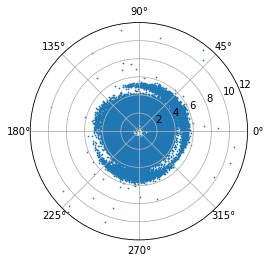

In [22]:
subplot = figure().add_subplot(111, polar = True)

subplot.scatter(theta, r, s=0.5)

for cls in ephem.Jupiter, ephem.Mars, ephem.Saturn:
    
    g = generate__planet_positions(cls, mjd-30, mjd+30)
    theta_r = np.array(list(g)).T
    
subplot.axis([None, None, 0.0, 12.0])

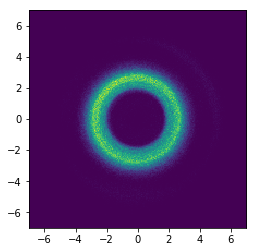

In [23]:
x = r*cos(theta)
y = -r*sin(theta)

heatmap, xedges, yedges = np.histogram2d(
    y, x, bins = 200, range = [[-7,7], [-7,7]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
imshow(heatmap, extent = extent)

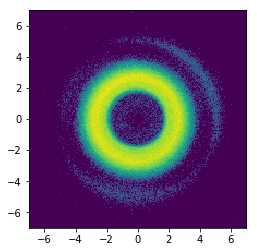

In [24]:
imshow(log(heatmap+1.0), extent=extent)

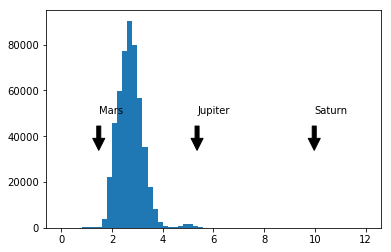

In [25]:
n, bins, patches = hist(r, bins= 60, range = [0.0, 12.0])

for cls in ephem.Mars, ephem.Jupiter, ephem.Saturn:
    planet = cls()
    planet.compute(mjd)
    annotate(
        planet.name,
        xy = (planet.sun_distance, 30000),
        xytext = (planet.sun_distance, 50000),
        arrowprops = dict(facecolor = 'black', shrink = 0.2)
    )

In [26]:
jupiter = ephem.Jupiter()
jupiter.compute(mjd)

jupiter.hlon

2.497485876083374

[0.0, 6.283185307179586, None, None]

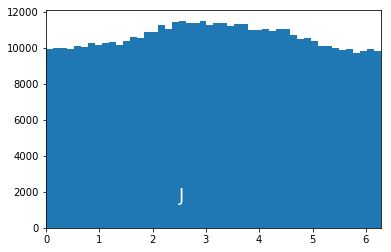

In [28]:
n, bins, patches = hist(theta, bins = 48)
jpos = (jupiter.hlon, 1500.0)
annotate('J', xy = jpos, fontsize = 18, color = white)
axis([0.0, tau, None, None])

[0.0, 6.283185307179586, None, None]

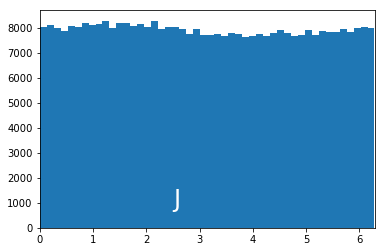

In [29]:
n, bins, patches = hist(theta[r < 3.0], bins=48)
jpos = (jupiter.hlon, 850.0)
annotate('J', xy=jpos, fontsize=24, color=white)
axis([0.0, tau, None, None])